# Explicit Example

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

Example we solved in class:

\begin{align*}
 \frac{dy}{dx} &= \frac {\sin(x)}{y}\\
 y\left(\frac{\pi}2\right) &=  2\\
\rightarrow y &= \sqrt{2(2-\cos(x))}
\end{align*}

In [2]:
# f'. In general a function of x and y, but this one is only a function of x
def f(x,y):
    return np.sin(x)/y

In [3]:
# Explicit solution that we found in class
def y(x):
    return np.sqrt(2*(2.-np.cos(x)))
    

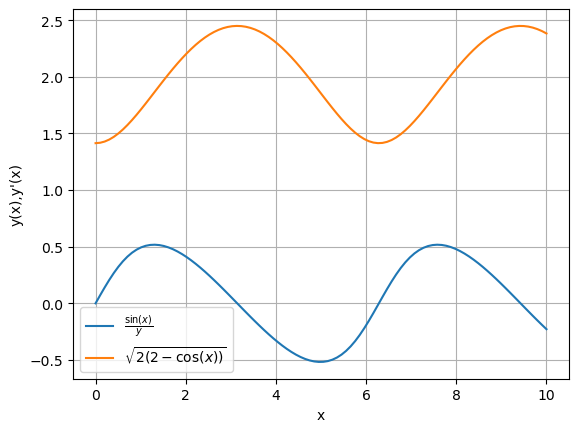

In [4]:
# Plot both
x = np.linspace(0.,10.,100)
plt.plot(x,f(x,y(x)),label = r'$\frac {\sin(x)}{y}$')
plt.plot(x,y(x),label = r'$\sqrt{2(2-\cos(x))}$')
plt.legend()
plt.xlabel('x')
plt.ylabel('y(x),y\'(x)')
plt.grid()
plt.show()

The function below will start with 
$$
    y_0=y(a) = c
$$
then extrapolate forward backward using
$$
     y_{j+1} = y_{j} + f(x_{j},y_{j})\times dx
$$
where
$$
        dx \approx \pm h
$$
where the sign is the sign of $(b-a)$ and the value accounts for possible roundoff errors.

In [5]:
# Do an euler extrapolation
# Arguments
# f = f(x,y): function returning the derivative as a function of x and y
# a: initial point in x
# b: final point in x (can be <a)
# c: y(a)
# h: step size in x
def euler(f,a,b,c,h):
    n =  int(abs(b-a)/h)    # number of points
    x = np.linspace(a,b,n)  # Array of xvalues
    # calculate delta x, accounting for roundoff errors and sign
    dx = x[1]-x[0]
    # output array
    y = np.empty(n)
    # Set to initial value
    y[0] = c
    # Extrapolate forward or backward, depending on dx
    for j in range(n-1):
        y[j+1] = y[j]+f(x[j],y[j])*dx
    return x,y

In [6]:
# extrapolate forward
h = .01
xfe,yfe = euler(f,np.pi/2.,10.,2.,h)
# extrapolate backward
xbe,ybe = euler(f,np.pi/2.,0.,2.,h)
    

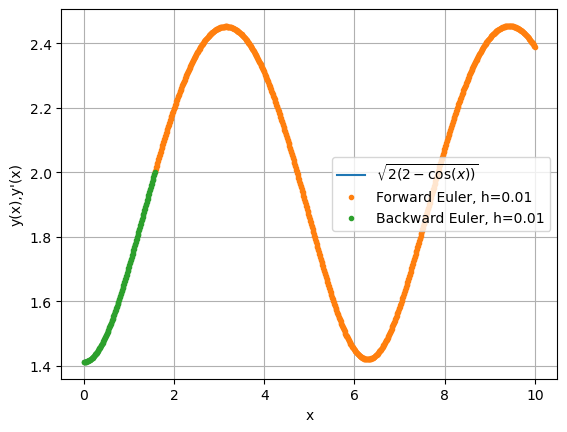

In [7]:
# Plot everything
x = np.linspace(0.,10.,100)
# The explicit solution
plt.plot(x,y(x),label = r'$\sqrt{2(2-\cos(x))}$')
plt.plot(xfe,yfe,'.', label = f'Forward Euler, h={h:.2f}')
plt.plot(xbe,ybe,'.', label = f'Backward Euler, h={h:.2f}')
plt.legend()
plt.xlabel('x')
plt.ylabel('y(x),y\'(x)')
plt.grid()
plt.show()

The function below will start with 
\begin{align*}
    y_0&=y(a) = c\\
    y'_0 &= y'(0) = d
\end{align*}
Then extrapolate forward or backward with

\begin{align*}
 y'_{j+1} &= y'_{j} + f(x_{j},y_{j},y'_{j})\times dx\\
 y_{j+1} &= y_{j} + y'_{j}\times dx
\end{align*}

where
$$
        dx \approx \pm h
$$
where the sign is the sign of $(b-a)$ and the value accounts for possible roundoff errors.

In [8]:
# Do a 2nd order euler extrapolation
# Arguments
# f = f(x,y,y'): function returning the derivative as a function of x, y, and y'
# a: initial point in x
# b: final point in x (can be <a)
# c: y(a)
# d: y'(a)
# h: step size in x
def euler2(f,a,b,c,d,h):
    n =  int(abs(b-a)/h)    # number of points
    x = np.linspace(a,b,n)  # Array of xvalues
    # calculate delta x, accounting for roundoff errors and sign
    dx = x[1]-x[0]
    # derivative output array
    yp = np.empty(n)
    # function output array
    y = np.empty(n)
    # Set to initial value
    y[0] = c
    yp[0] = d
    # Extrapolate forward or backward, depending on dx
    for j in range(n-1):
        yp[j+1] = yp[j]+f(x[j],y[j],yp[j])*dx
        y[j+1] = y[j]+yp[j]*dx
    return x,y,yp

Harmonic oscillator example
\begin{align*}
                k &= m = 1.\\
                x_0&=1\\
                v_0&=0
\end{align*}
Explicit solution 
\begin{align*}
x(t) &= \cos(t)\\
v(t) &= -\sin(t)
\end{align*}

In [9]:
# Second order function of second derivative, just depends on x
# Undamped, undriven harmonic oscillator.
# Remember:
#  t->x
#  x->y
def f2(x,y,yp):
    return (-y)

In [10]:
#range
tmin = 0.
tmax = 10.

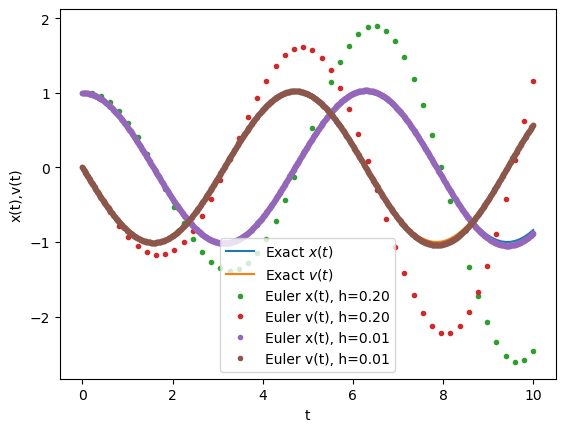

In [11]:
t = np.linspace(tmin,tmax,100)
plt.plot(t,np.cos(t),label=r'Exact $x(t)$')
plt.plot(t,-np.sin(t),label=r'Exact $v(t)$')
h = .2
# Calculate the Euler extrapolation
te,xe,ve = euler2(f2,tmin,tmax,1.,0.,h)
plt.plot(te,xe,'.',label=f'Euler x(t), h={h:.02f}')
plt.plot(te,ve,'.',label=f'Euler v(t), h={h:.02f}')
h = .01
# Calculate the Euler extrapolation
te,xe,ve = euler2(f2,tmin,tmax,1.,0.,h)
plt.plot(te,xe,'.',label=f'Euler x(t), h={h:.02f}')
plt.plot(te,ve,'.',label=f'Euler v(t), h={h:.02f}')
plt.xlabel('t')
plt.ylabel('x(t),v(t)')
plt.legend()
plt.show()

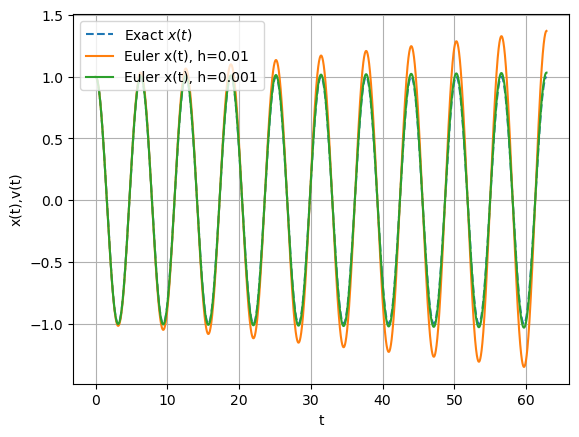

In [12]:
tmin = 0.
tmax = 20*np.pi
t = np.linspace(tmin,tmax,500)
plt.plot(t,np.cos(t),'--',label=r'Exact $x(t)$')
h = .01
# Calculate the Euler extrapolation
te,xe,ve = euler2(f2,tmin,tmax,1.,0.,h)
plt.plot(te,xe,label=f'Euler x(t), h={h}')
h = .001
# Calculate the Euler extrapolation
te,xe,ve = euler2(f2,tmin,tmax,1.,0.,h)
plt.plot(te,xe,label=f'Euler x(t), h={h}')
plt.grid()
plt.xlabel('t')
plt.ylabel('x(t),v(t)')
plt.legend()
plt.show()

Add a damping term

\begin{align*}
m\frac{d^2x}{dt^2} +\gamma\frac{dx}{dt} + kx &= 0\\
\rightarrow \frac{d^x}{dt^2} +\frac \gamma m\frac{dx}{dt} + \frac km x &= 0\\
\frac{d^2x}{dt^2} +2\eta\omega_0\frac{dx}{dt} + \omega_0^2 x &= 0\\
\end{align*}

where
\begin{align*}
\omega_0 &= \sqrt{\frac km}\\
\eta &= \frac \gamma{2\sqrt{km}}~~~~\textrm{(damping~factor)}
\end{align*}

In [13]:
# Define a normalized damping term
def fdamped(x,y,yp):
    return -y-2*eta*yp

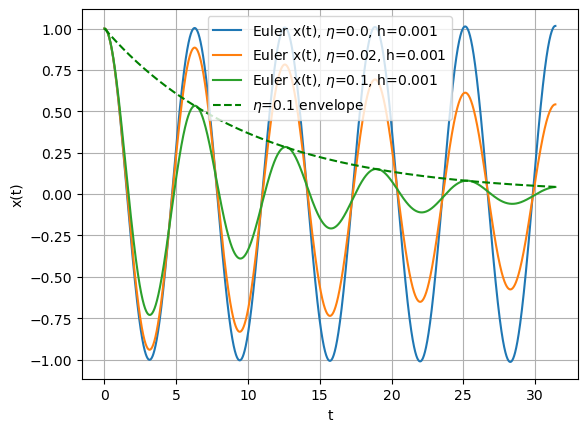

In [14]:
tmin = 0.
tmax = 10.*np.pi
t = np.linspace(tmin,tmax,500)

h = .001
# Calculate the Euler extrapolation
eta_char = r'$\eta$'
eta = 0.
te,xe,ve = euler2(fdamped,tmin,tmax,1.,0.,h)
plt.plot(te,xe,'tab:blue',label=f'Euler x(t), {eta_char}={eta}, h={h}')
eta = .02
te,xe,ve = euler2(fdamped,tmin,tmax,1.,0.,h)
plt.plot(te,xe,'tab:orange',label=f'Euler x(t), {eta_char}={eta}, h={h}')
eta = .1
te,xe,ve = euler2(fdamped,tmin,tmax,1.,0.,h)
plt.plot(te,xe,'tab:green',label=f'Euler x(t), {eta_char}={eta}, h={h}')
plt.plot(t,np.exp(-eta*t),'g--',label=f'{eta_char}={eta} envelope')
plt.grid()
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend()
plt.show()

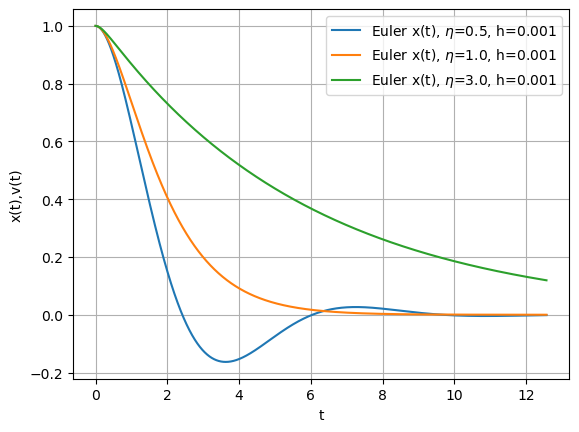

In [15]:
tmin = 0.
tmax = 4*np.pi
t = np.linspace(tmin,tmax,500)
h = .001
# Calculate the Euler extrapolation
eta_char = r'$\eta$'
eta = 0.5
te,xe,ve = euler2(fdamped,tmin,tmax,1.,0.,h)
plt.plot(te,xe,'',label=f'Euler x(t), {eta_char}={eta}, h={h}')
eta = 1.
te,xe,ve = euler2(fdamped,tmin,tmax,1.,0.,h)
plt.plot(te,xe,'',label=f'Euler x(t), {eta_char}={eta}, h={h}')
eta = 3.
te,xe,ve = euler2(fdamped,tmin,tmax,1.,0.,h)
plt.plot(te,xe,'',label=f'Euler x(t), {eta_char}={eta}, h={h}')
plt.grid()
plt.xlabel('t')
plt.ylabel('x(t),v(t)')
plt.legend()
plt.show()

In [16]:
# Define a normalized damping term
def fturb(x,y,yp):
    return -y-kappa*yp**2*np.sign(yp)

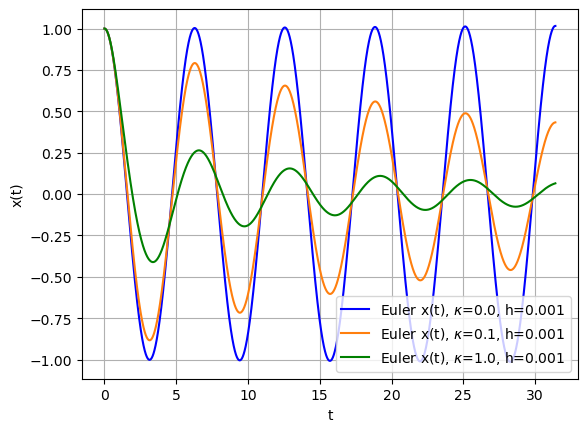

In [17]:
tmin = 0.
tmax = 10.*np.pi
t = np.linspace(tmin,tmax,500)

h = .001
# Calculate the Euler extrapolation
kappa_char = r'$\kappa$'
kappa = 0.
te,xe,ve = euler2(fturb,tmin,tmax,1.,0.,h)
plt.plot(te,xe,'b',label=f'Euler x(t), {kappa_char}={kappa}, h={h}')
kappa = 0.1
te,xe,ve = euler2(fturb,tmin,tmax,1.,0.,h)
plt.plot(te,xe,'tab:orange',label=f'Euler x(t), {kappa_char}={kappa}, h={h}')
kappa = 1.
te,xe,ve = euler2(fturb,tmin,tmax,1.,0.,h)
plt.plot(te,xe,'g',label=f'Euler x(t), {kappa_char}={kappa}, h={h}')

plt.grid()
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend()
plt.show()

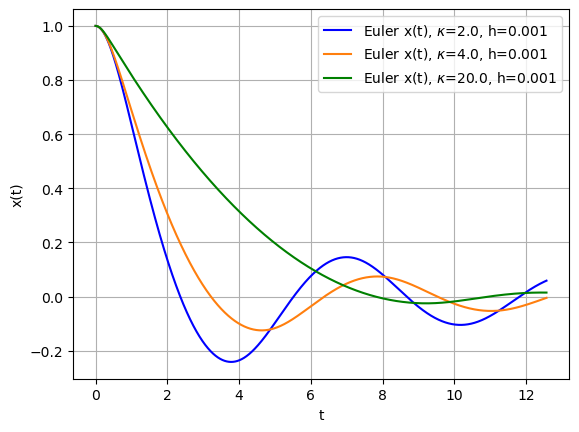

In [18]:
tmin = 0.
tmax = 4.*np.pi
t = np.linspace(tmin,tmax,500)

h = .001
# Calculate the Euler extrapolation
kappa_char = r'$\kappa$'
kappa = 2.
te,xe,ve = euler2(fturb,tmin,tmax,1.,0.,h)
plt.plot(te,xe,'b',label=f'Euler x(t), {kappa_char}={kappa}, h={h}')
kappa = 4.
te,xe,ve = euler2(fturb,tmin,tmax,1.,0.,h)
plt.plot(te,xe,'tab:orange',label=f'Euler x(t), {kappa_char}={kappa}, h={h}')
kappa = 20.
te,xe,ve = euler2(fturb,tmin,tmax,1.,0.,h)
plt.plot(te,xe,'g',label=f'Euler x(t), {kappa_char}={kappa}, h={h}')

plt.grid()
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend()
plt.show()

# Using built-in ODE solver

I'm going to swith to a formalism where t is the independent variable and x is the dependent variable

In [19]:
eta = 0.05               # Damping parameter
y0 = np.array([1.,0.])   # inital values of x
# In need to define a generic ode that will return the rate of change of each element based in the
# independent variable, the dependent variable, and all it's lower derivative
# Damped oscilator
def linear_ode(t,y):
    # No explicit time dependence
    dy = y[1] 
    dv = - y[0] - 2*eta*y[1]
    return dy,dv

In [20]:
# Define a generic Euler extrapolation
def gen_euler(ode,a,b,y0,h):
    n = int((b-a)/h)
    y = np.empty((n,len(y0)))
    t = np.linspace(a,b,n)
    dt = t[1]-t[0]
    y[0] = y0
    for j in range(n-1):
        y[j+1] = y[j] + dt*np.array(ode(t[j],y[j]))
    return t,y
    

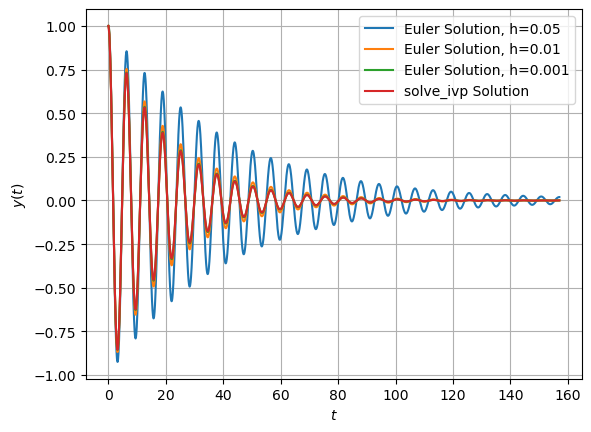

In [21]:
tmin = 0.
tmax = 50*np.pi
t = np.linspace(tmin, tmax, 500)
# Plot the Euler solution
h = .05
te,ye = gen_euler(linear_ode,tmin,tmax,y0,h)
plt.plot(te,ye[:,0],label=f'Euler Solution, h={h}')
h = .01
te,ye = gen_euler(linear_ode,tmin,tmax,y0,h)
plt.plot(te,ye[:,0],label=f'Euler Solution, h={h}')
h = .001
te,ye = gen_euler(linear_ode,tmin,tmax,y0,h)
plt.plot(te,ye[:,0],label=f'Euler Solution, h={h}')

# Now use the built in solver
from scipy.integrate import solve_ivp
solution = solve_ivp(linear_ode, (tmin,tmax), y0, t_eval=t)# Plot the solver solution
plt.plot(t,solution.y[0],label='solve_ivp Solution')
plt.xlabel(r'$t$')
plt.ylabel(r'$y(t)$')
plt.grid()
plt.legend()
plt.show()

In [24]:
# Now define a driven oscillator
eta = 0.01
x0 = np.array([1.,0.])
def driven_ode(t,y):
    dy = y[1] 
    dv = - y[0] - 2*eta*y[1] + np.sin(t*w_drive)
    return dy,dv

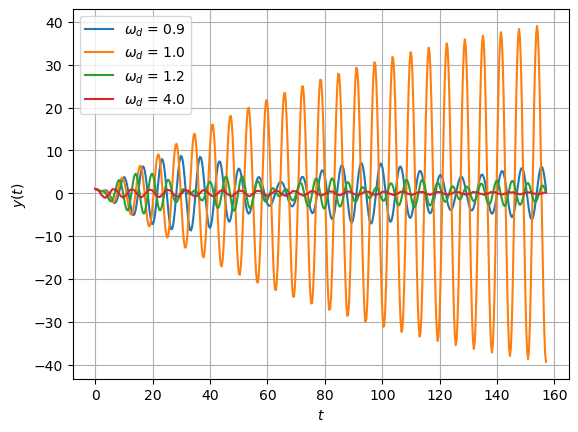

In [25]:
# try several values of w_drive
w_drive_char = r'$\omega_d$'

w_drive = .9
solution = solve_ivp(driven_ode, (tmin,tmax), x0, t_eval=t)
plt.plot(t,solution.y[0],label=f'{w_drive_char} = {w_drive}')
w_drive = 1.0
solution = solve_ivp(driven_ode, (tmin,tmax), x0, t_eval=t)
plt.plot(t,solution.y[0],label=f'{w_drive_char} = {w_drive}')
w_drive = 1.2
solution = solve_ivp(driven_ode, (tmin,tmax), x0, t_eval=t)
plt.plot(t,solution.y[0],label=f'{w_drive_char} = {w_drive}')
w_drive = 4.
solution = solve_ivp(driven_ode, (tmin,tmax), x0, t_eval=t)
plt.plot(t,solution.y[0],label=f'{w_drive_char} = {w_drive}')
plt.xlabel(r'$t$')
plt.ylabel(r'$y(t)$')
plt.legend()
plt.grid()
plt.show()